In [5]:
import numpy as np
import pandas as pd
import os
from nltk.corpus import stopwords
import string

In [3]:
test_file = "C:/Users/Sree/Downloads/aclImdb/test"
train_file = "C:/Users/Sree/Downloads/aclImdb/train"

In [42]:
review_list = []
rating_list = []

In [43]:
def review_list_(file,category,review_list,rating_list):
    for i in os.listdir(file+"/"+category):
        review_ = open(file+"/"+category+"/"+i,'r',encoding="ISO-8859-1").read()
        review_ = [c for c in review_ if c not in string.punctuation]
        review_ = ''.join(review_)
        review_ = [ c for c in review_.split() if c.lower() not in stopwords.words("english")]
        review_ = ' '.join(review_)
        review_list.append(review_)
        if category is "neg":
            rating_list.append(0)
        else:
            rating_list.append(1)
        
        
        
        
        

In [44]:
for j in [test_file,train_file]:
    for i in ["pos","neg"]:
        review_list_(j,i,review_list,rating_list)
        

In [49]:
reviews = pd.DataFrame(columns = ["review","rating"])

In [52]:
reviews["review"] = review_list
reviews["rating"] = rating_list

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [73]:
bowtransform =CountVectorizer()
bowtransform.fit(reviews["review"])
msg_bow = bowtransform.transform(reviews["review"])


In [46]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(msg_bow.toarray(),reviews["rating"],test_size=0.5)

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [81]:
from sklearn.metrics import classification_report,confusion_matrix

In [82]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.72      0.59      0.65      1210
           1       0.51      0.65      0.57       792

    accuracy                           0.62      2002
   macro avg       0.62      0.62      0.61      2002
weighted avg       0.64      0.62      0.62      2002



In [83]:
print(confusion_matrix(pred,y_test))

[[717 493]
 [275 517]]


In [84]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Error Rate')

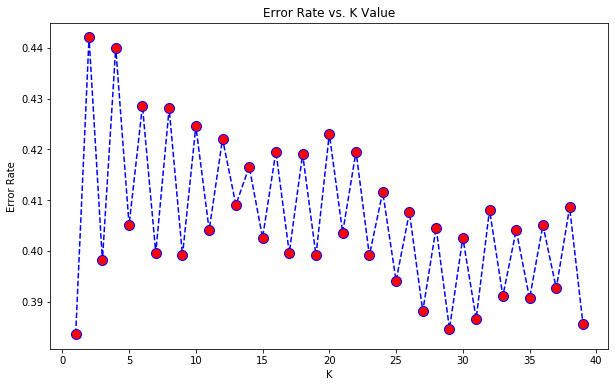

In [97]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')